In [1]:
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import model_selection

from time import time
import logging

In [2]:
spark = SparkSession.builder.master("spark://spark-master-01:7077").enableHiveSupport().getOrCreate()

In [3]:
spark.sql("show tables").show()

+--------------------+-----------+
|           tableName|isTemporary|
+--------------------+-----------+
|carshare_historic...|      false|
|     carshare_sample|      false|
| carshare_sample_1mm|      false|
|       customer_data|      false|
|          customerdm|      false|
|       customer_eval|      false|
|    customer_grouped|      false|
|   customer_training|      false|
|demo3_train_obd_data|      false|
|demo3_train_obd_test|      false|
|          got_tweets|      false|
|             got_web|      false|
|   obd_data_for_test|      false|
|  obd_data_for_train|      false|
|          prediction|      false|
|             titanic|      false|
+--------------------+-----------+



In [5]:
obd_train_data =  spark.sql("""SELECT label AS CarIsOK, P1, P2, P3, P4, P5, P6, \
    P7, P8, E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11 \
    FROM obd_data_for_test""").na.drop()

obd_train_data.printSchema()


root
 |-- CarIsOK: double (nullable = true)
 |-- P1: double (nullable = true)
 |-- P2: double (nullable = true)
 |-- P3: integer (nullable = true)
 |-- P4: double (nullable = true)
 |-- P5: double (nullable = true)
 |-- P6: integer (nullable = true)
 |-- P7: double (nullable = true)
 |-- P8: integer (nullable = true)
 |-- E1: double (nullable = true)
 |-- E2: double (nullable = true)
 |-- E3: integer (nullable = true)
 |-- E4: integer (nullable = true)
 |-- E5: double (nullable = true)
 |-- E6: integer (nullable = true)
 |-- E7: integer (nullable = true)
 |-- E8: integer (nullable = true)
 |-- E9: integer (nullable = true)
 |-- E10: integer (nullable = true)
 |-- E11: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: integer (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: integer (nullable = true)
 |-- V6: integer (nullable = true)
 |-- V7: integer (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: integer (null

In [6]:
# Features to exclude (linear correlations, not required)
features_exclude_list = ["E2","E9","V6","V10","V7","V9","P8","P4"]

X = obd_train_data

for column in features_exclude_list:
    X = X.drop(column)
#print(X.columns)
#print(obd_train_data.columns)

#y = obd_train_data["CarIsOK"]

In [7]:
Xpd = X.toPandas()

['CarIsOK', 'P1', 'P2', 'P3', 'P5', 'P6', 'P7', 'E1', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E10', 'E11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V8', 'V11']
['CarIsOK', 'P1', 'P2', 'P3', 'P5', 'P6', 'P7', 'E1', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E10', 'E11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V8', 'V11']


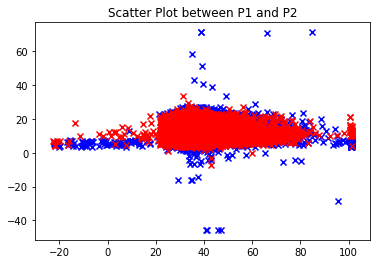

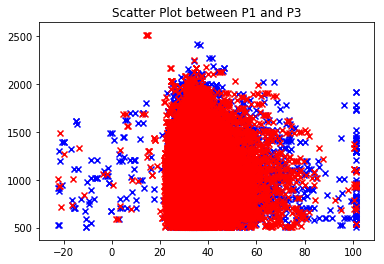

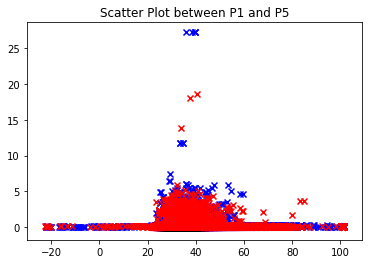

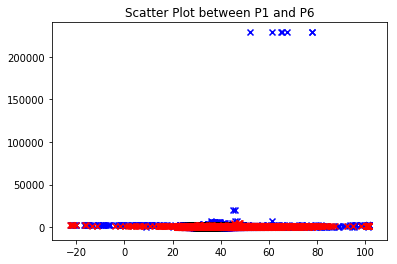

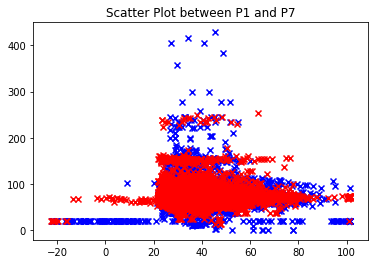

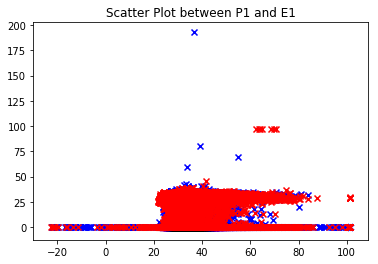

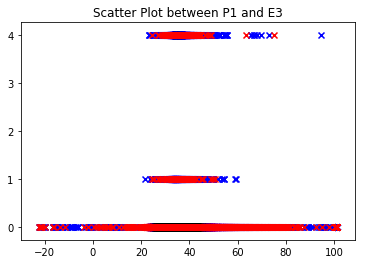

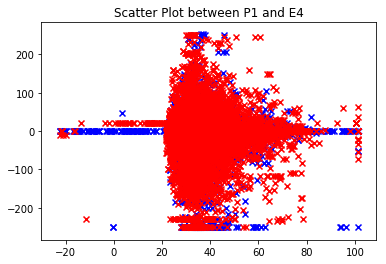

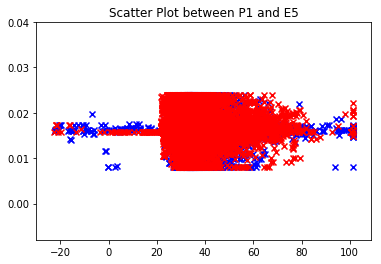

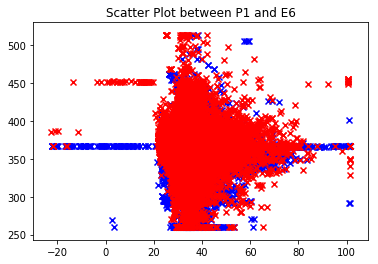

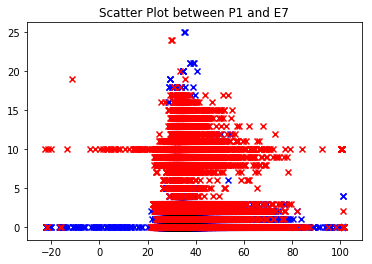

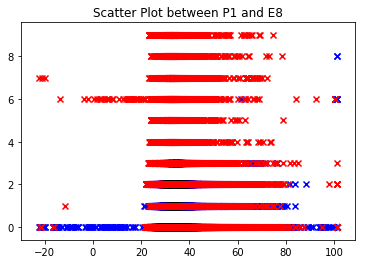

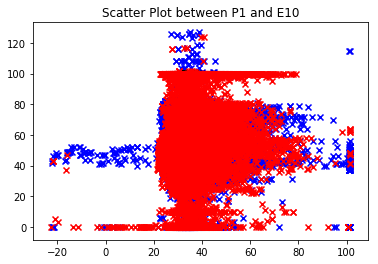

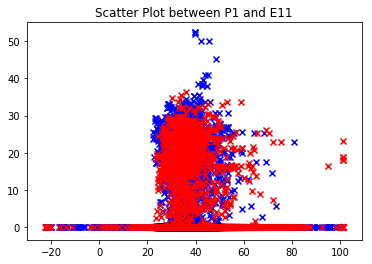

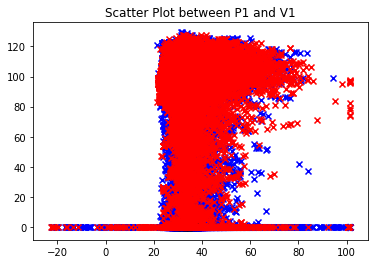

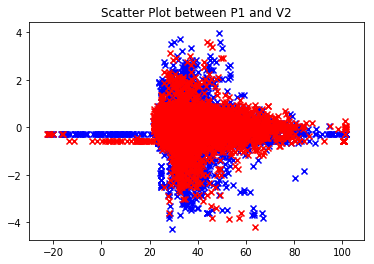

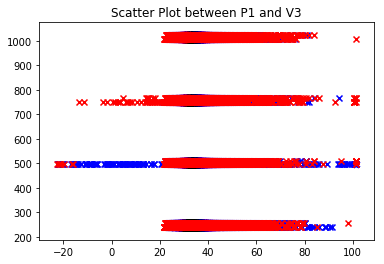

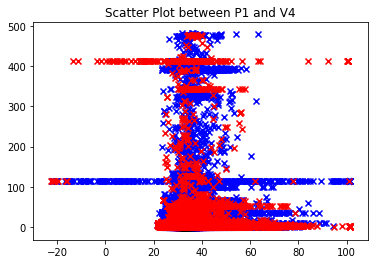

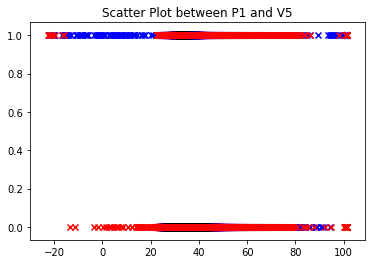

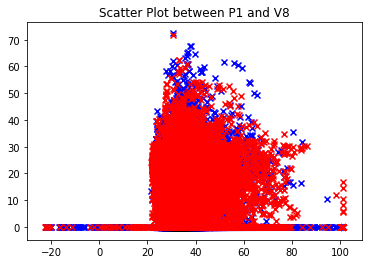

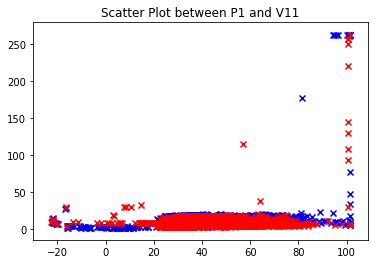

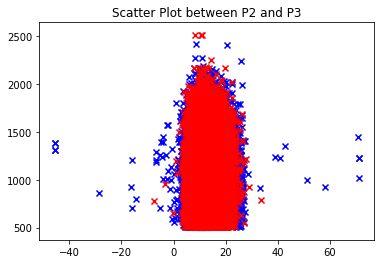

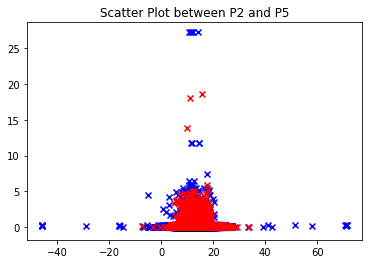

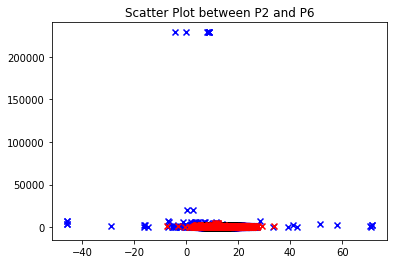

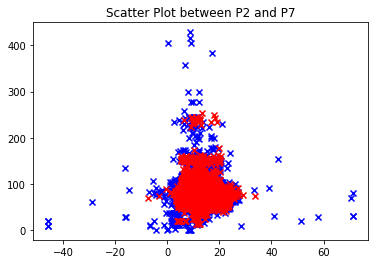

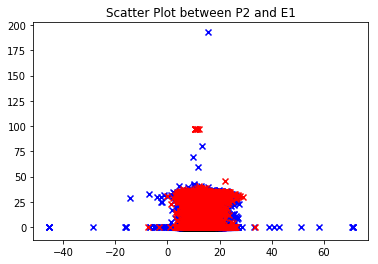

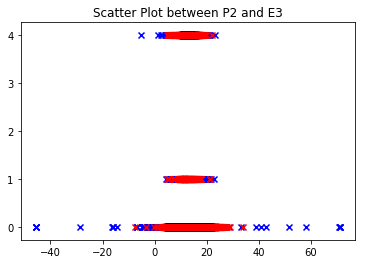

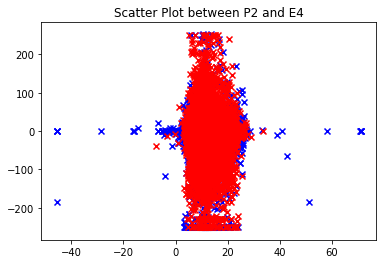

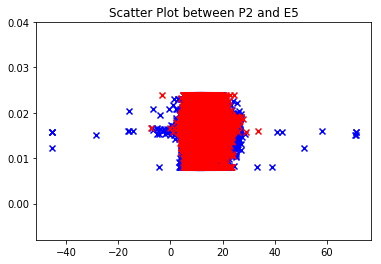

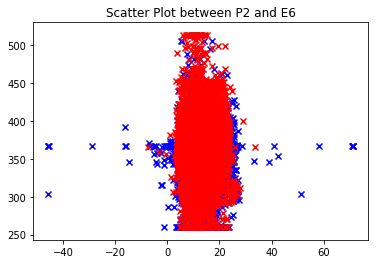

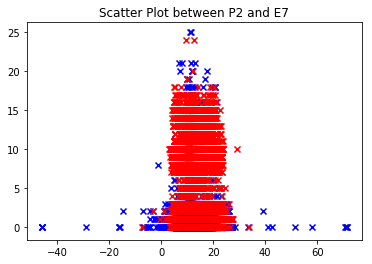

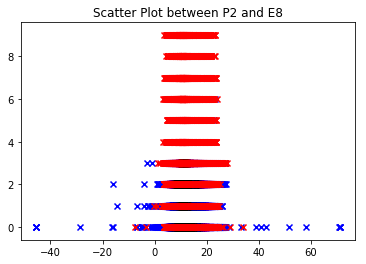

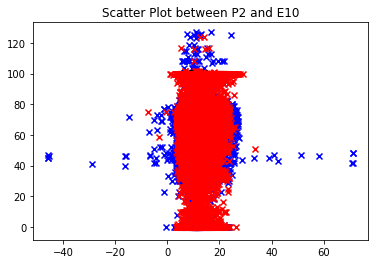

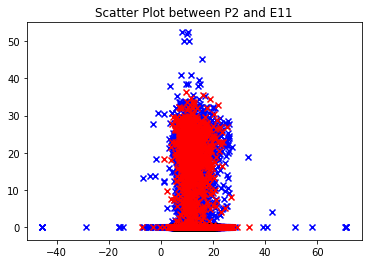

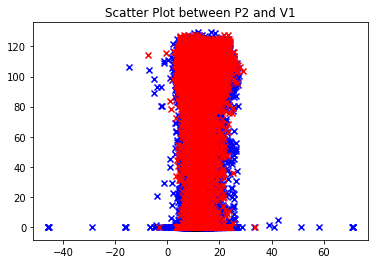

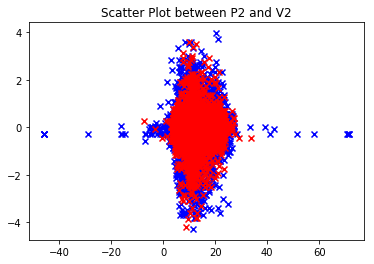

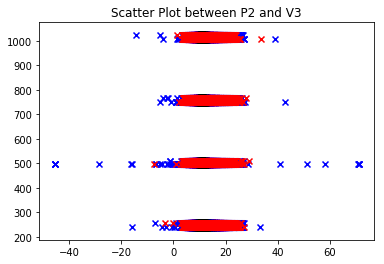

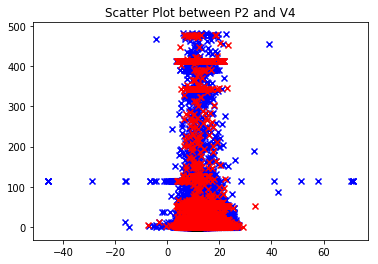

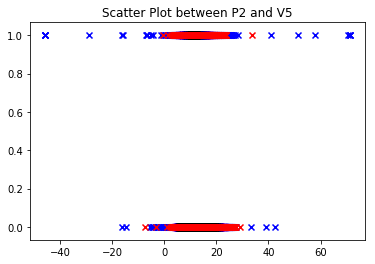

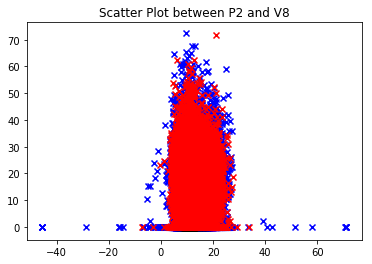

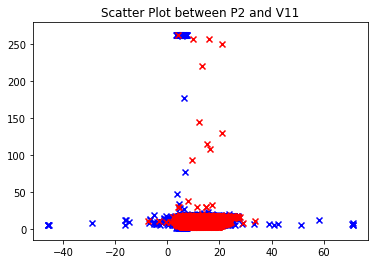

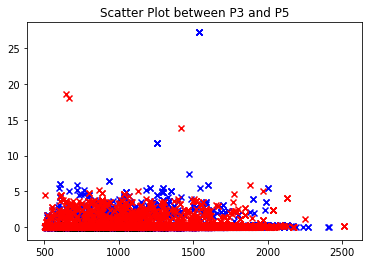

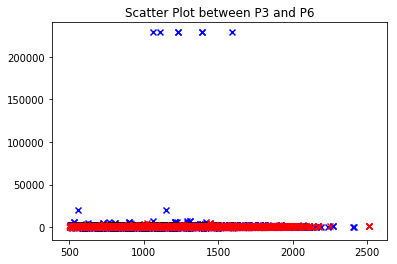

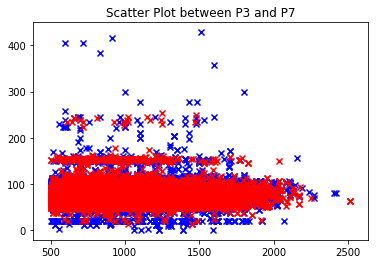

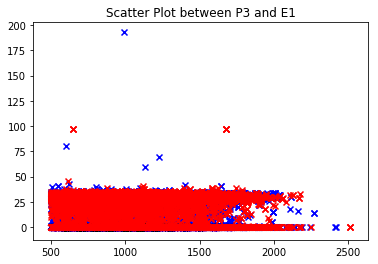

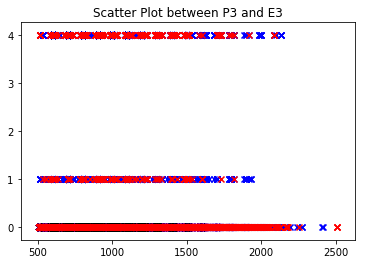

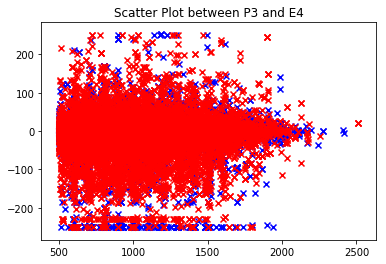

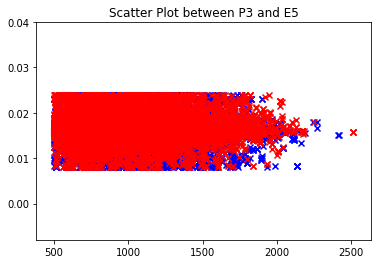

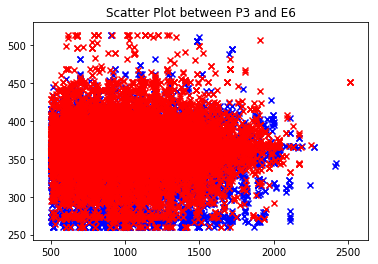

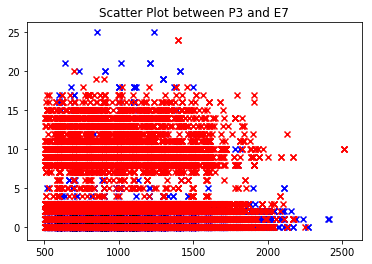

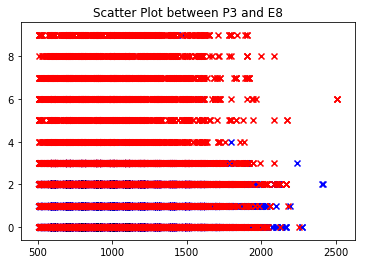

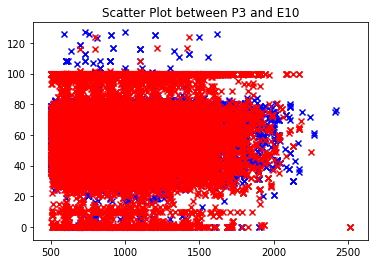

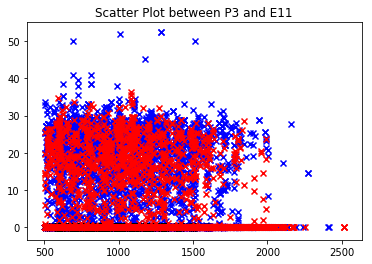

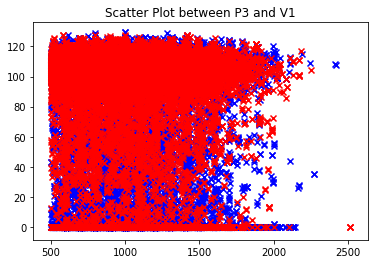

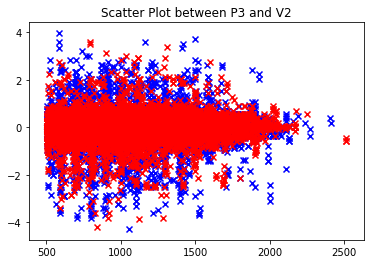

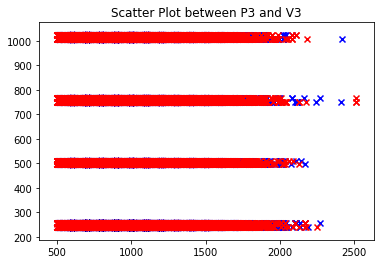

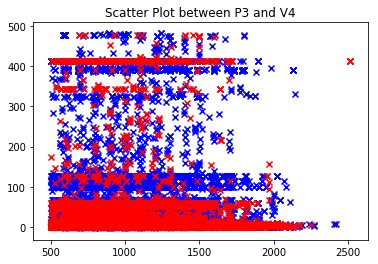

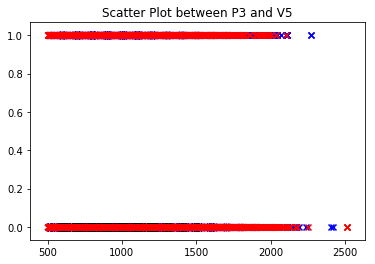

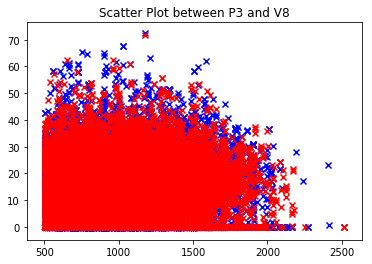

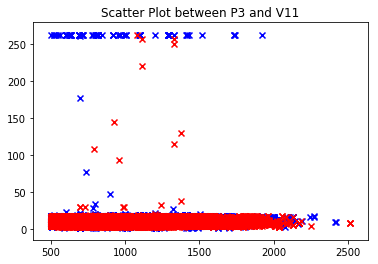

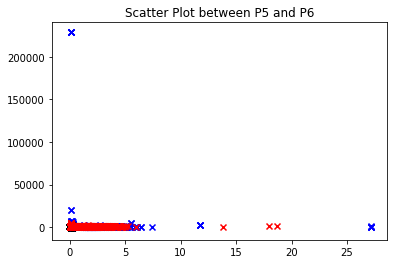

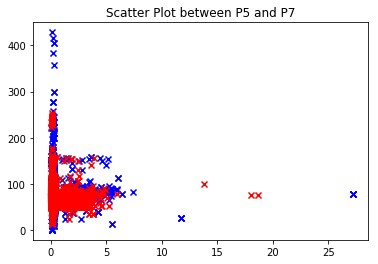

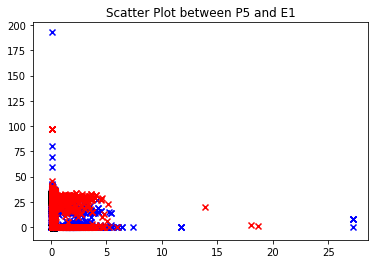

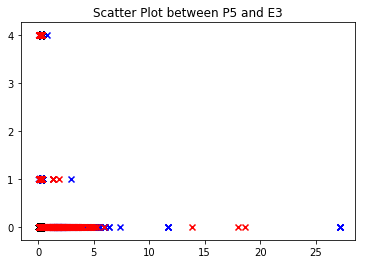

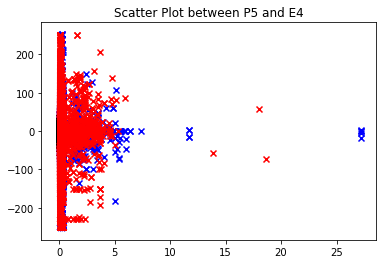

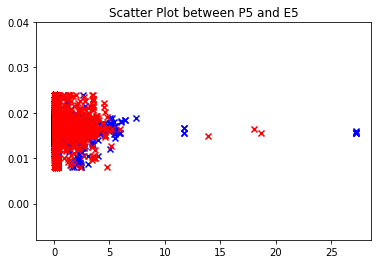

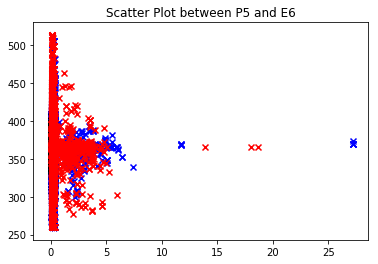

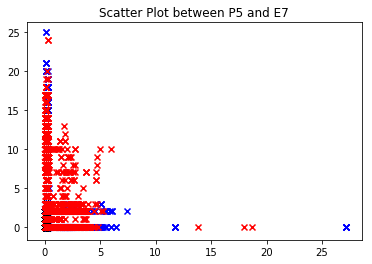

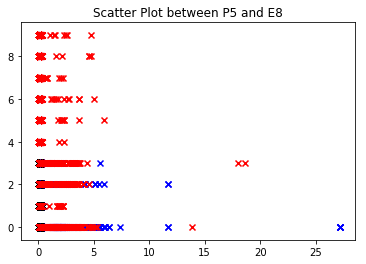

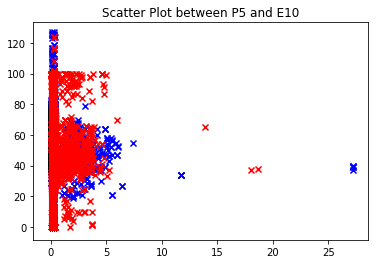

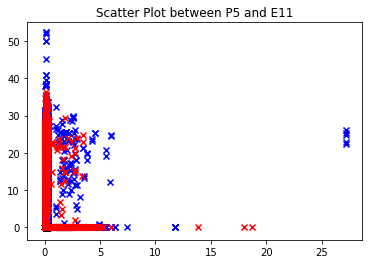

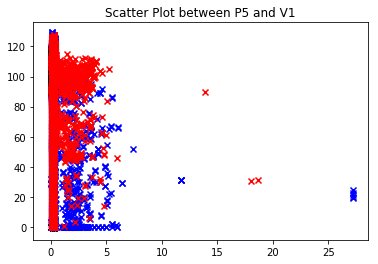

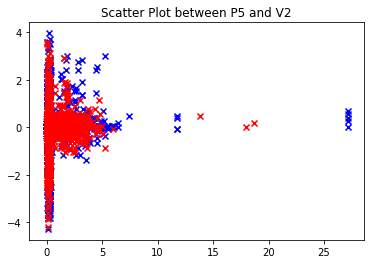

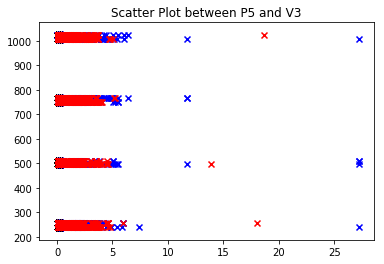

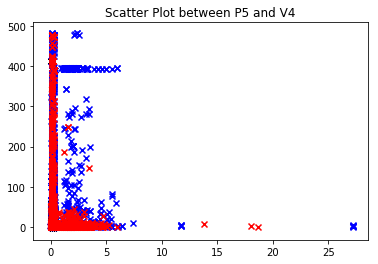

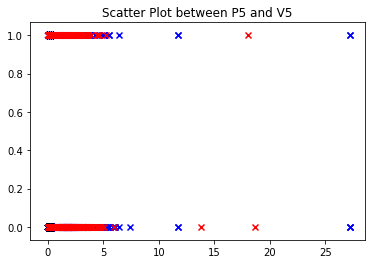

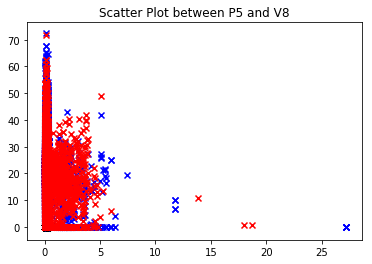

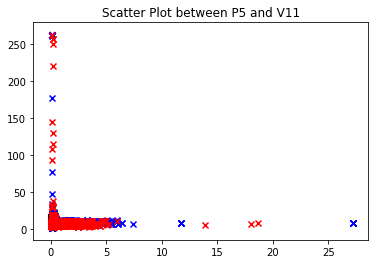

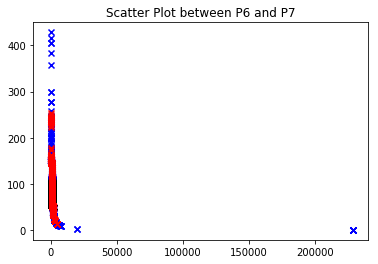

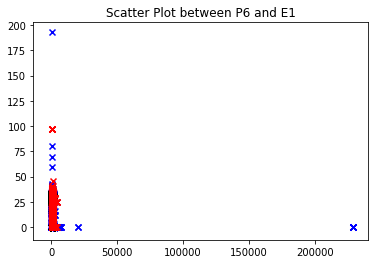

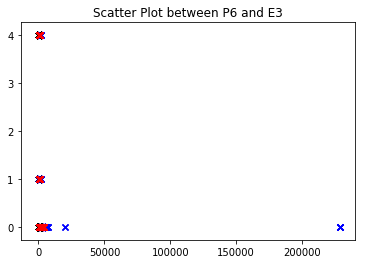

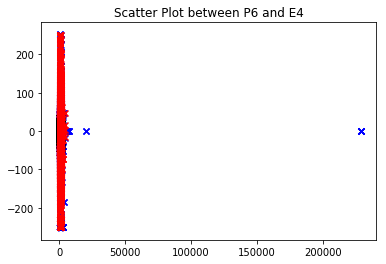

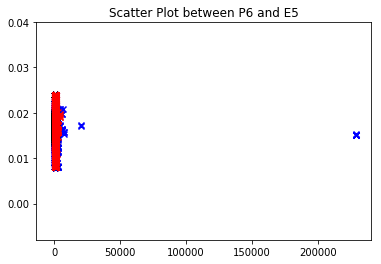

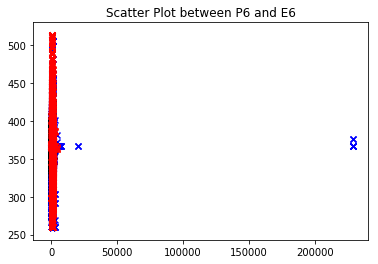

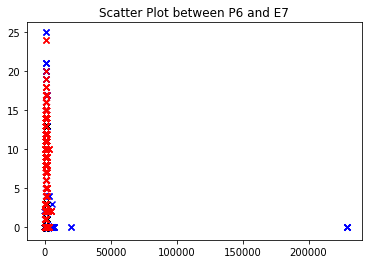

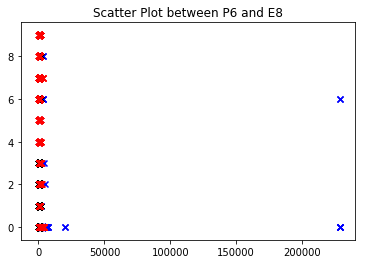

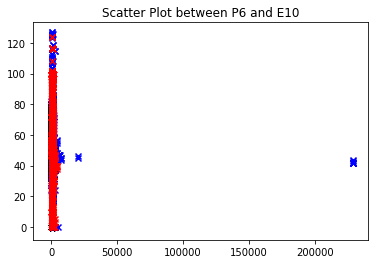

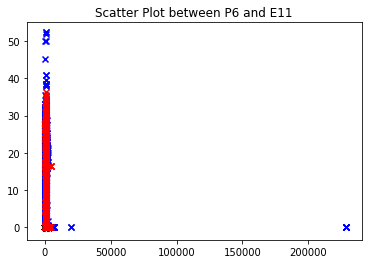

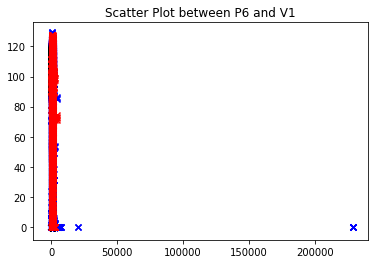

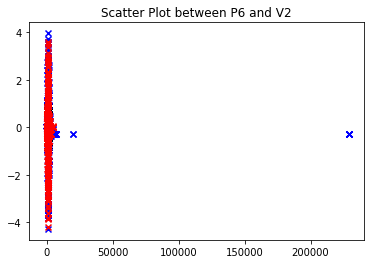

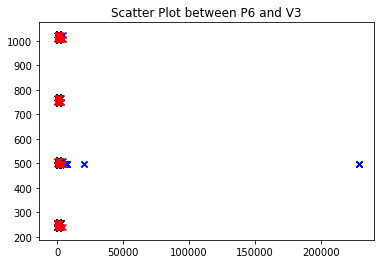

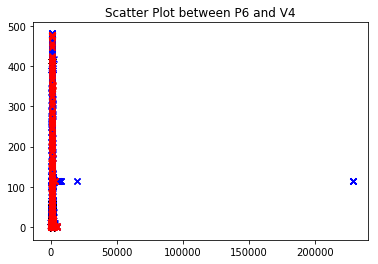

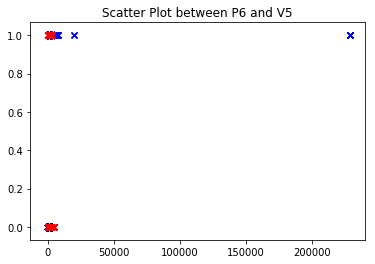

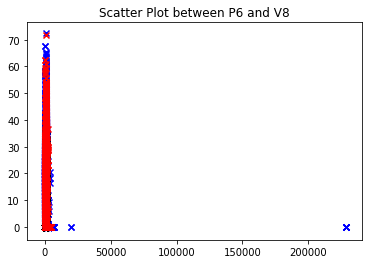

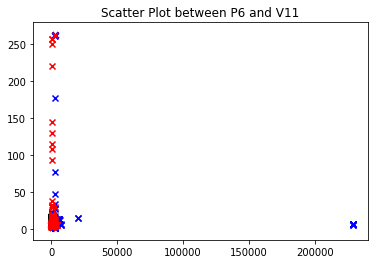

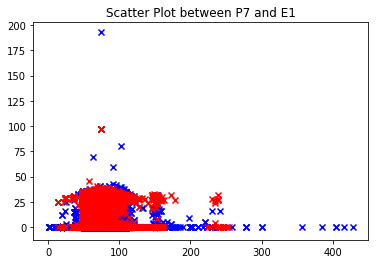

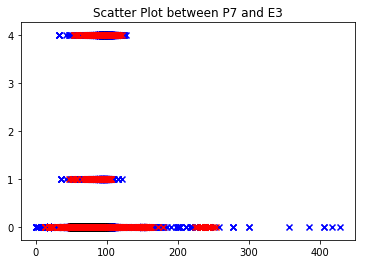

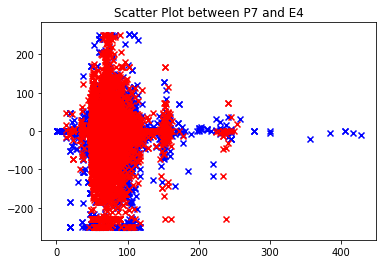

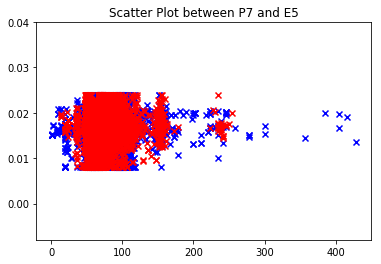

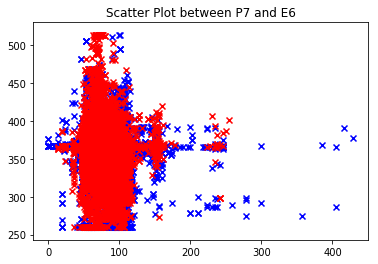

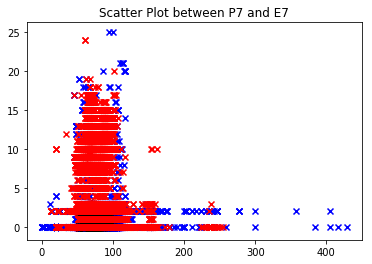

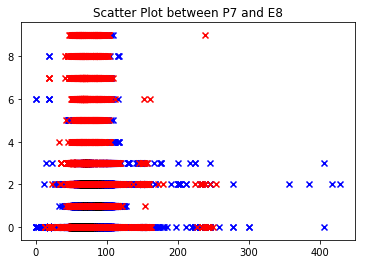

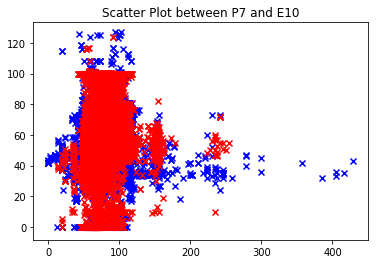

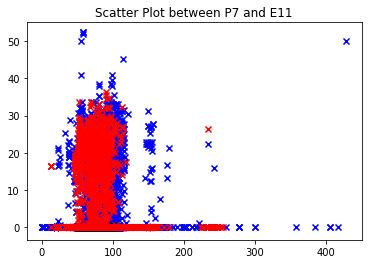

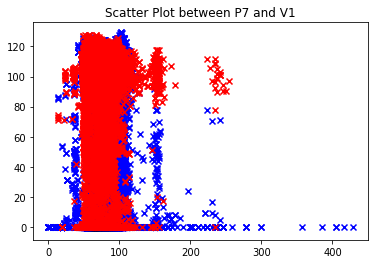

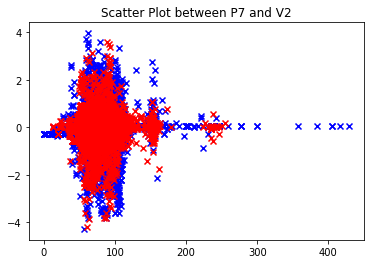

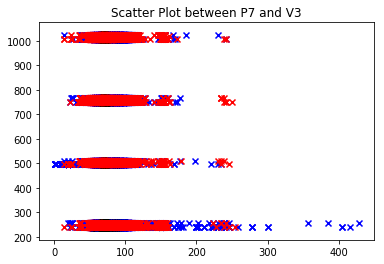

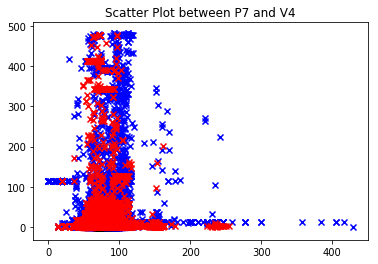

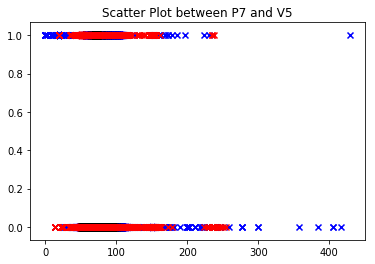

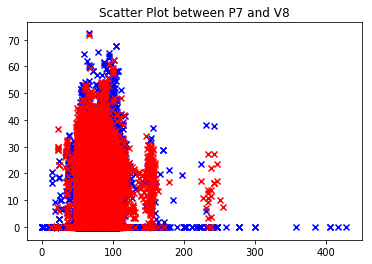

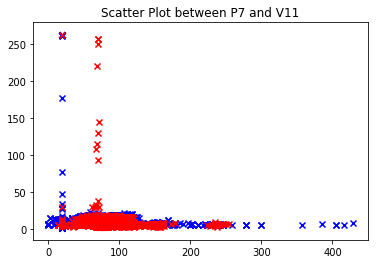

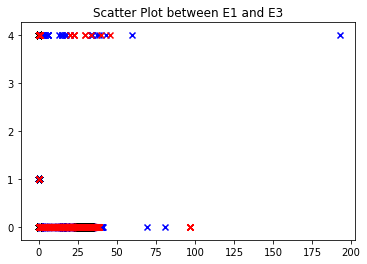

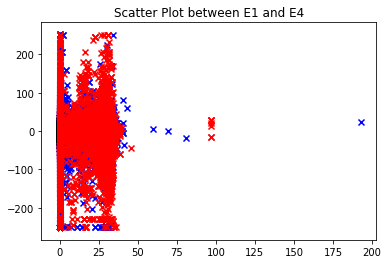

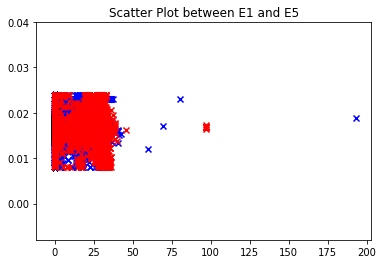

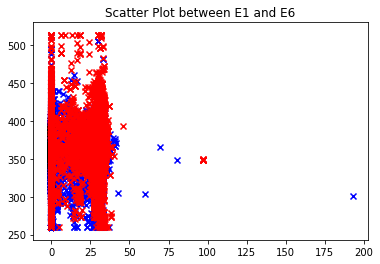

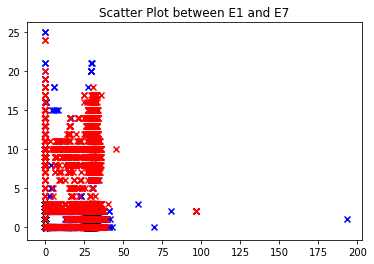

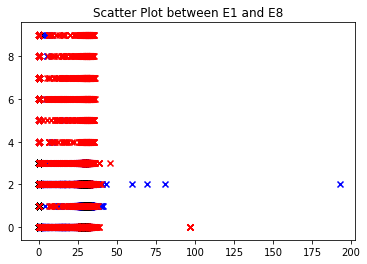

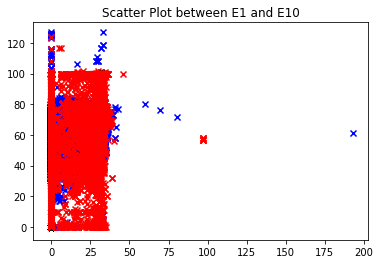

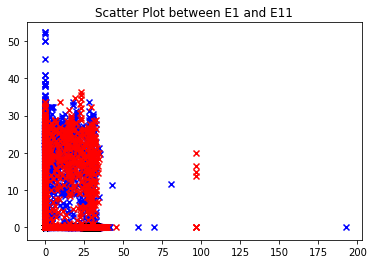

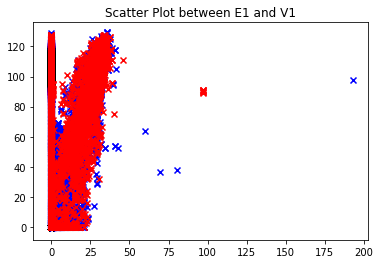

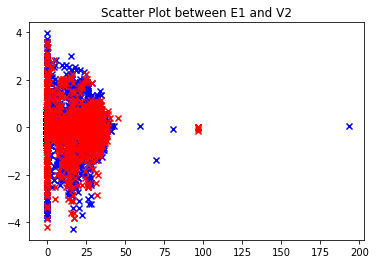

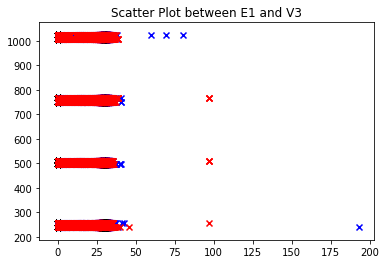

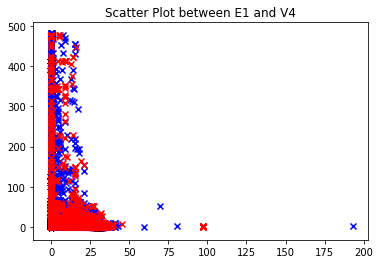

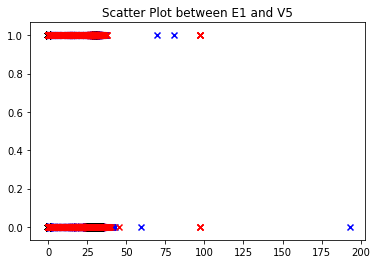

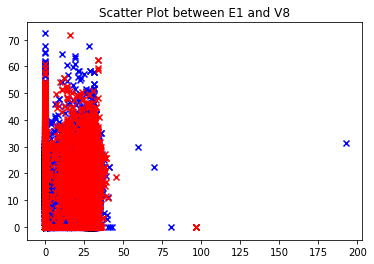

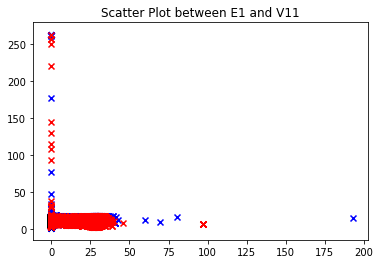

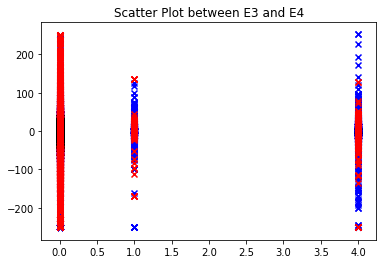

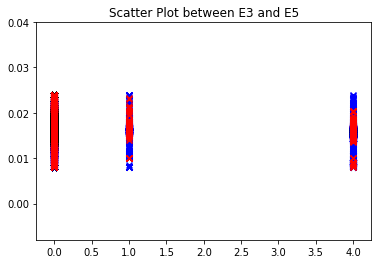

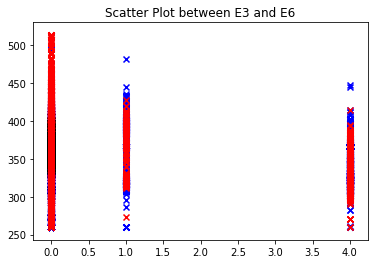

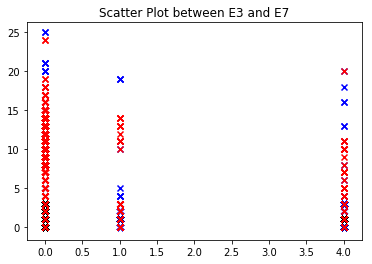

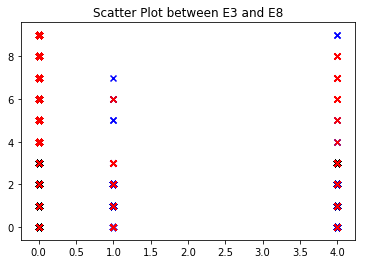

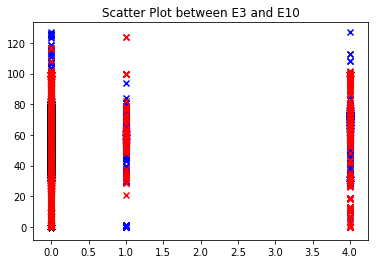

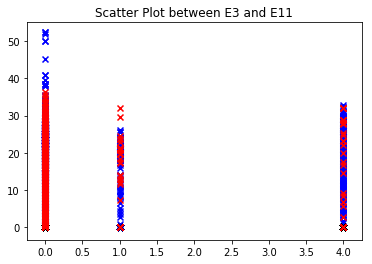

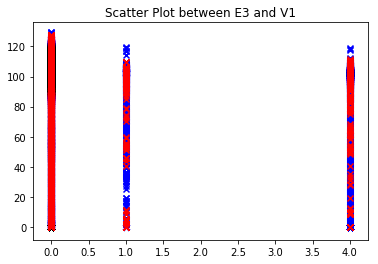

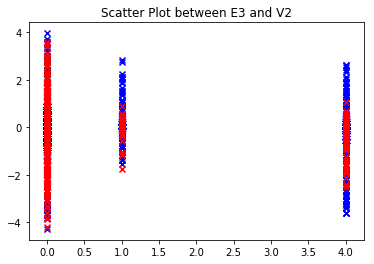

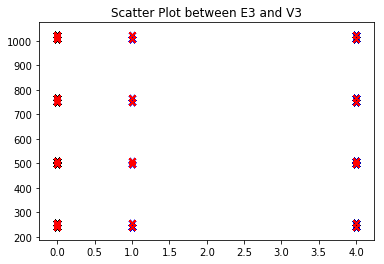

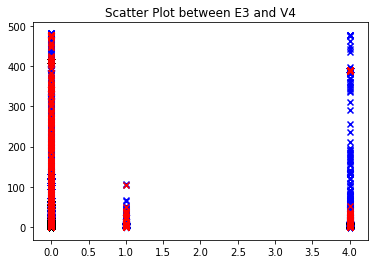

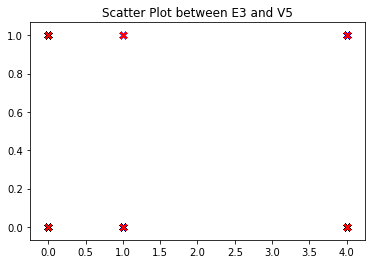

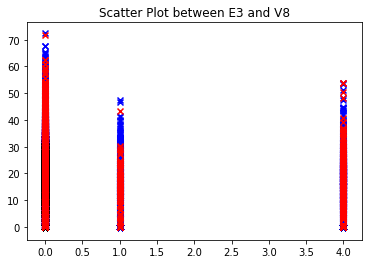

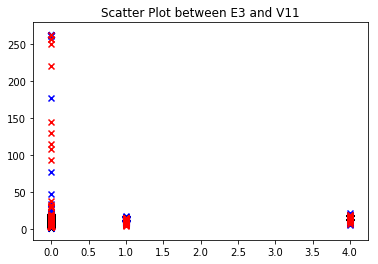

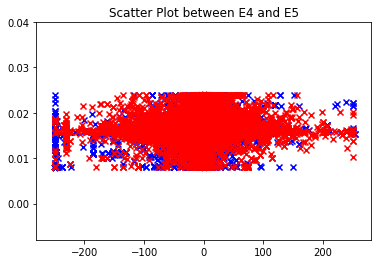

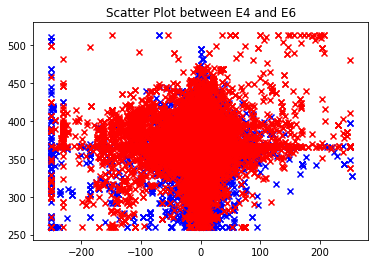

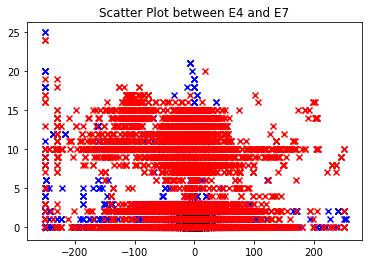

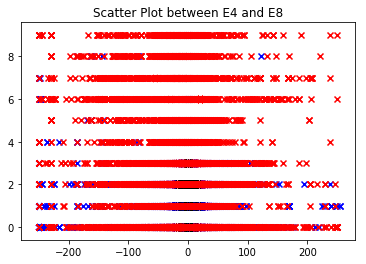

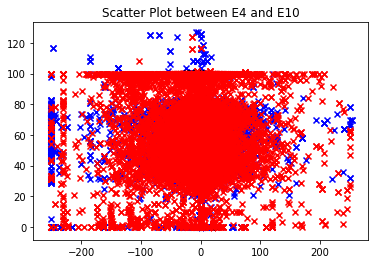

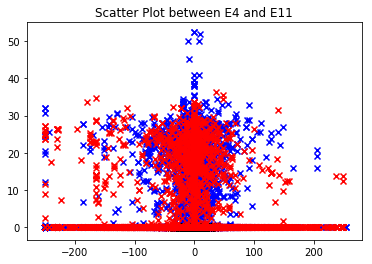

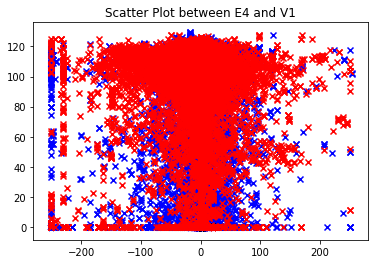

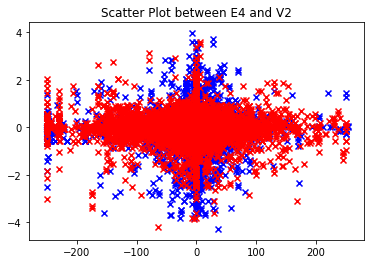

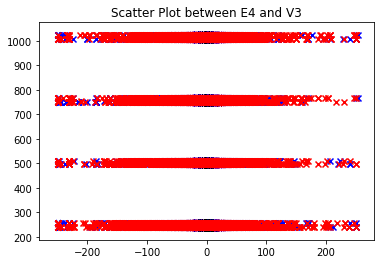

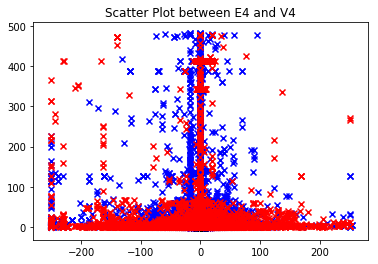

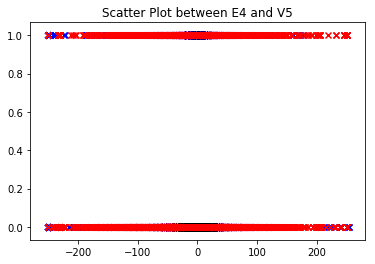

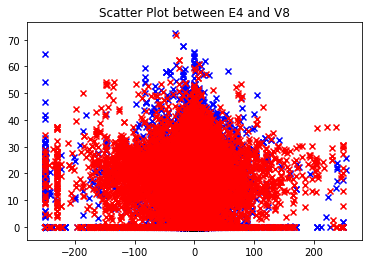

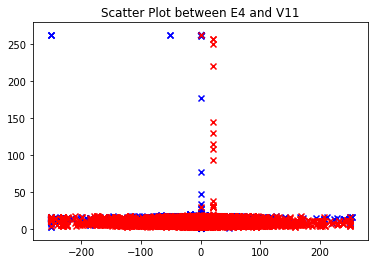

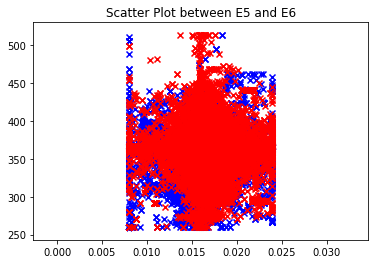

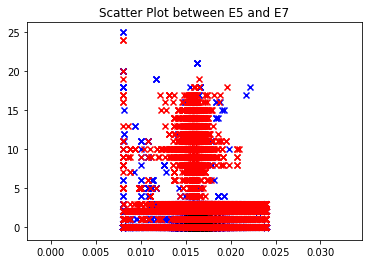

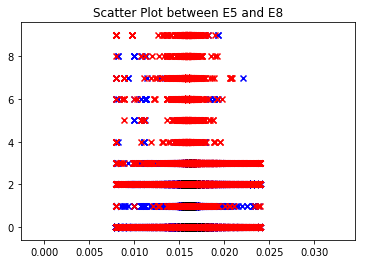

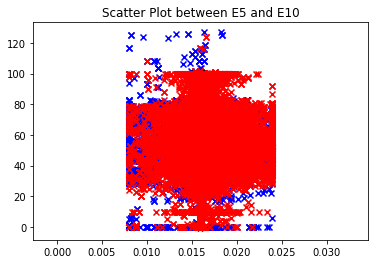

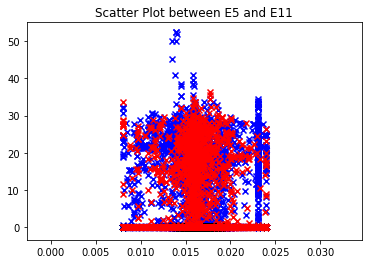

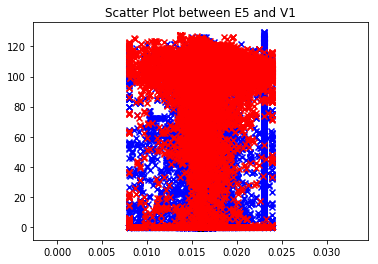

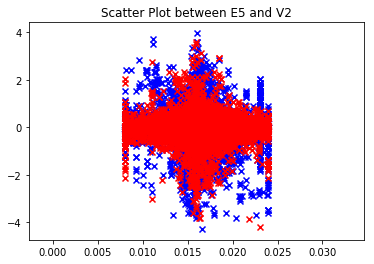

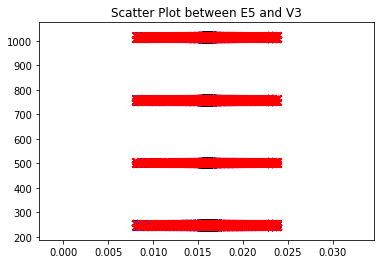

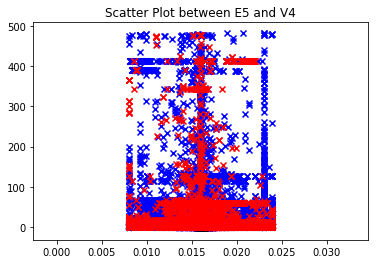

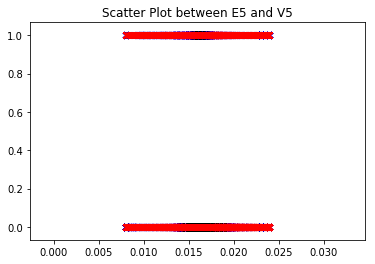

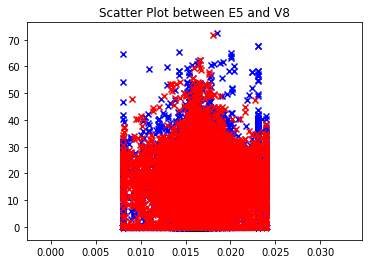

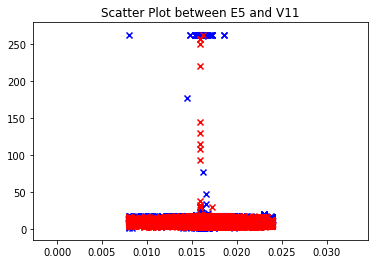

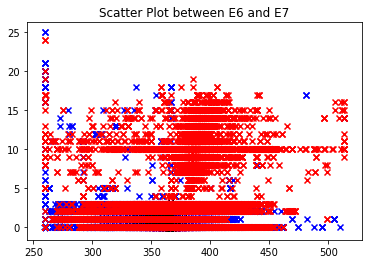

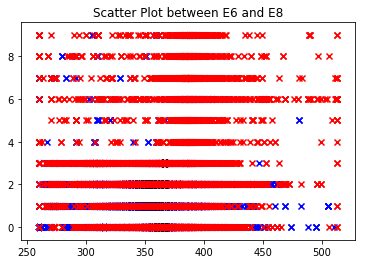

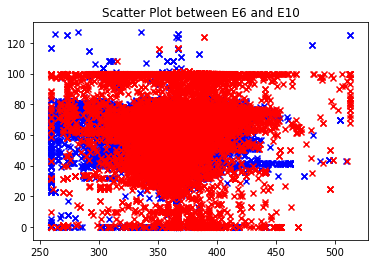

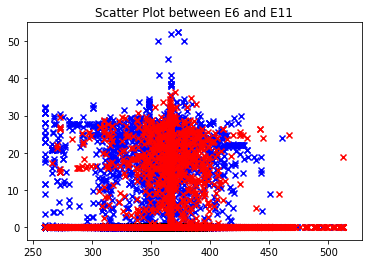

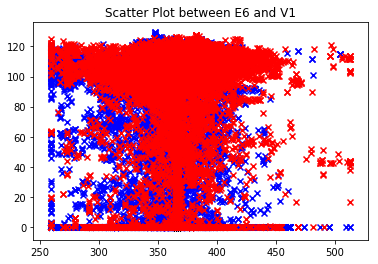

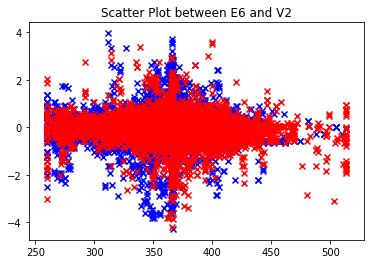

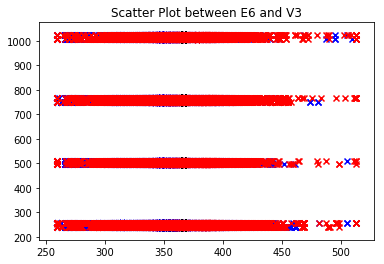

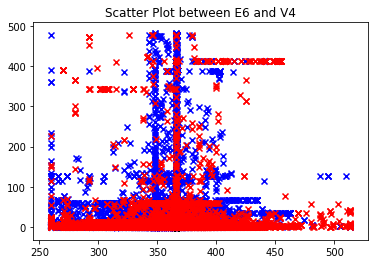

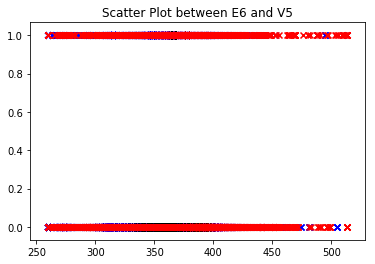

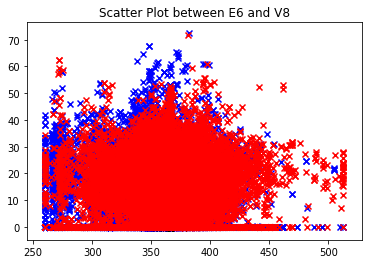

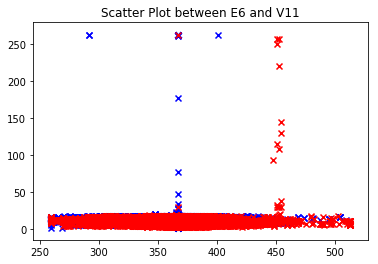

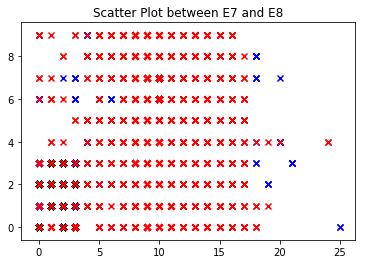

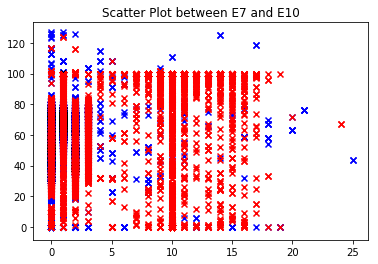

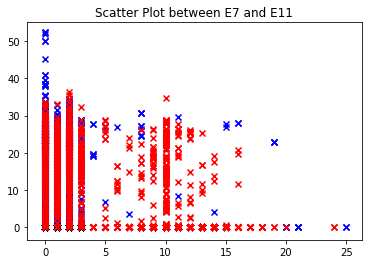

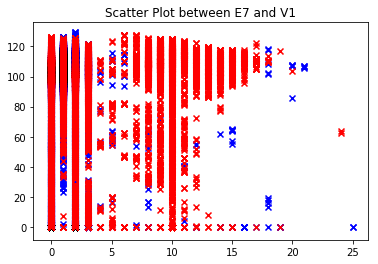

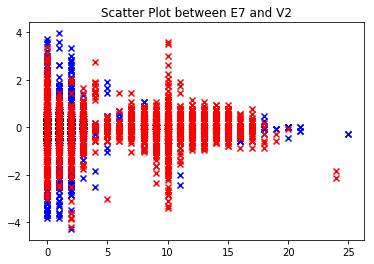

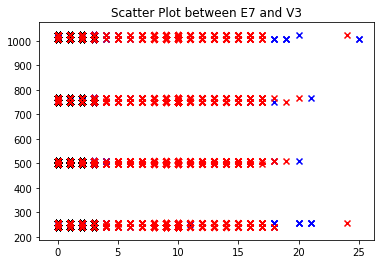

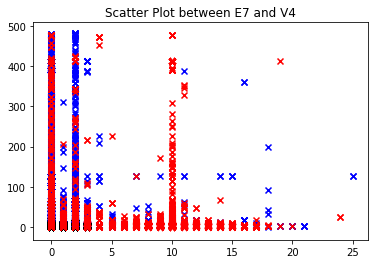

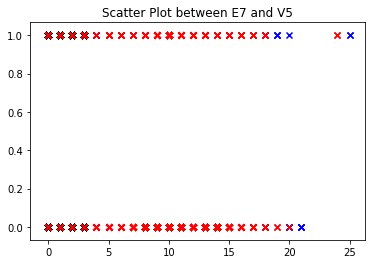

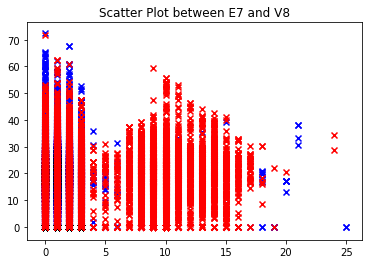

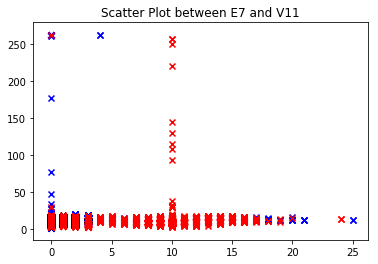

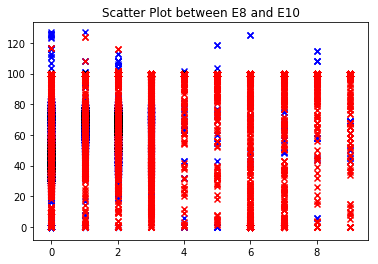

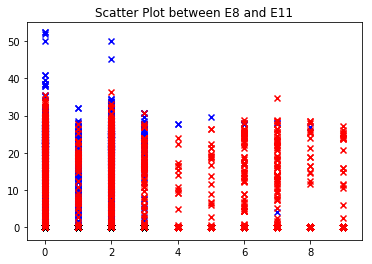

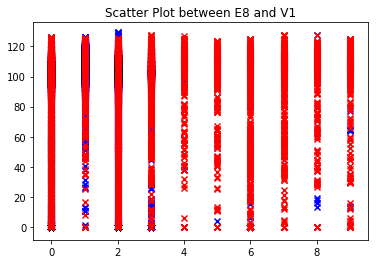

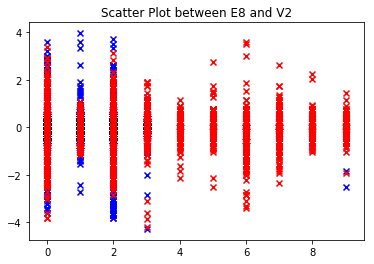

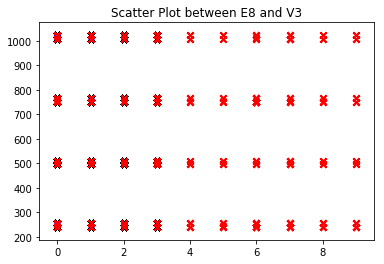

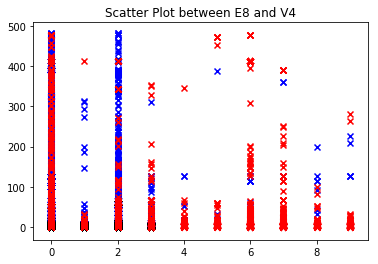

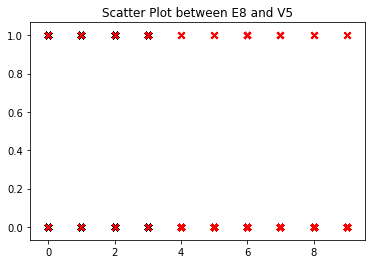

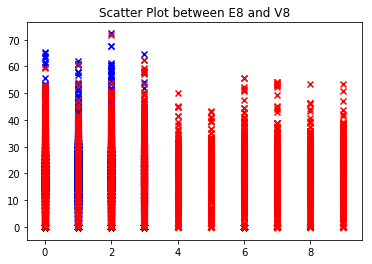

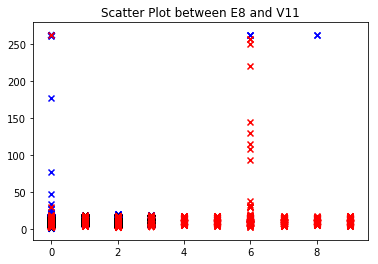

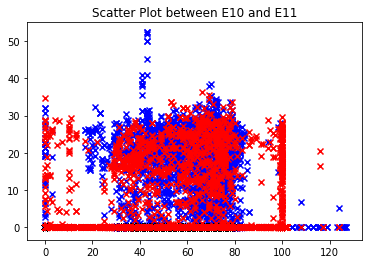

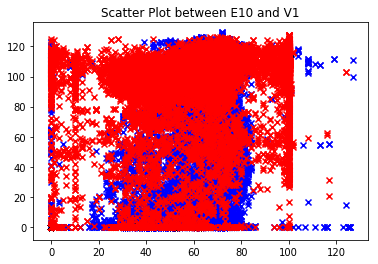

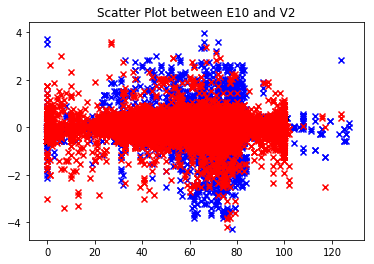

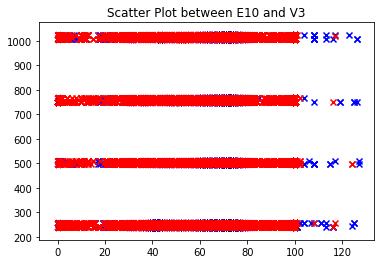

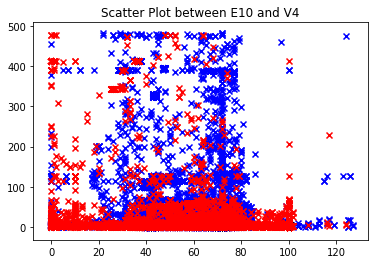

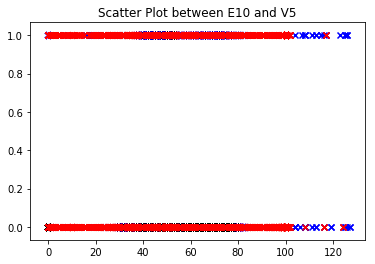

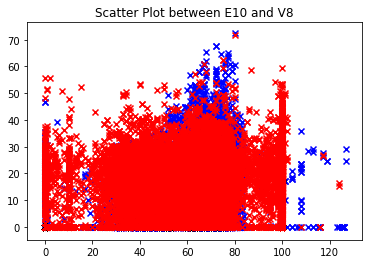

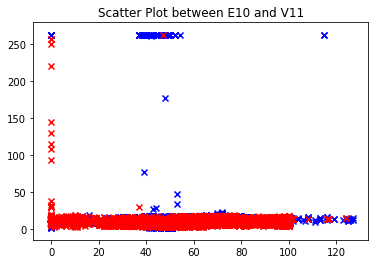

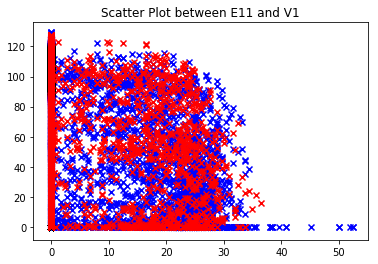

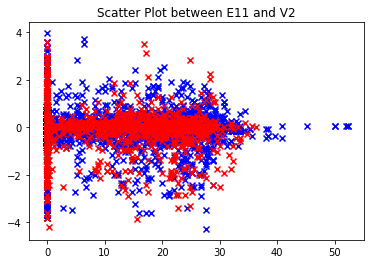

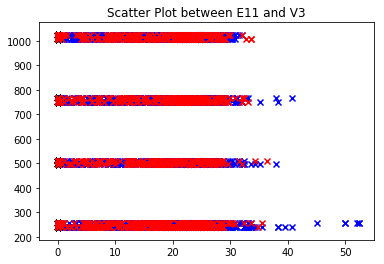

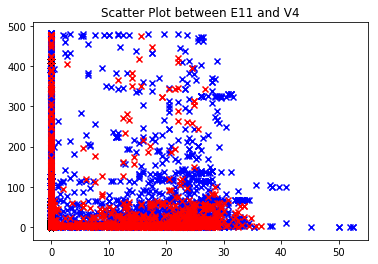

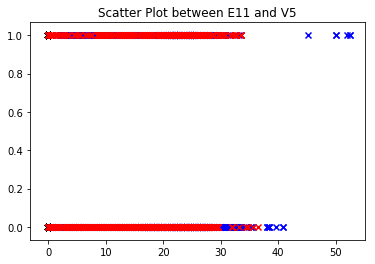

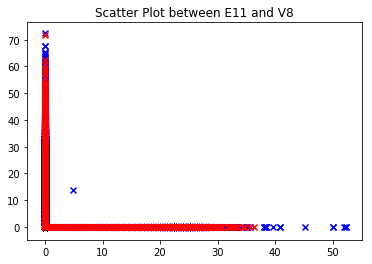

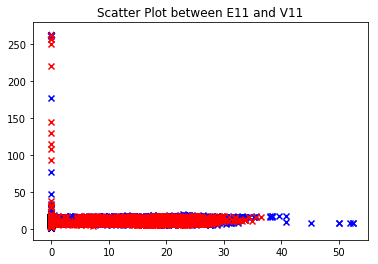

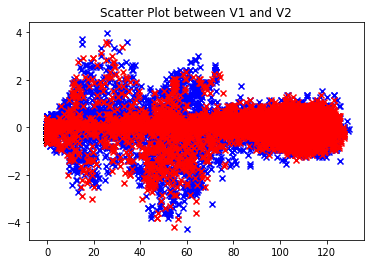

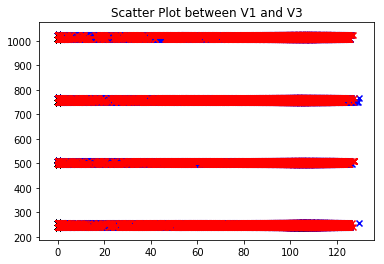

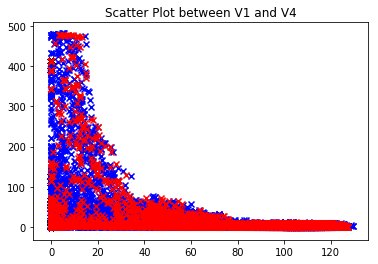

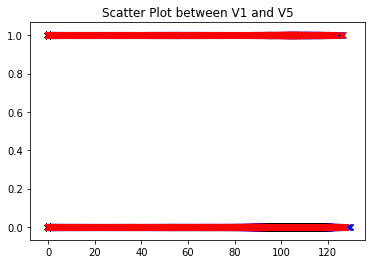

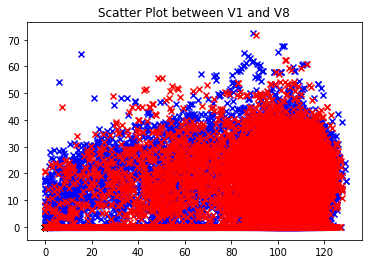

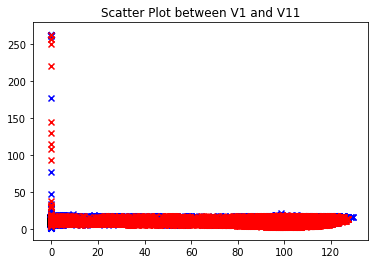

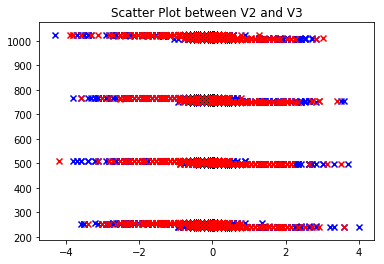

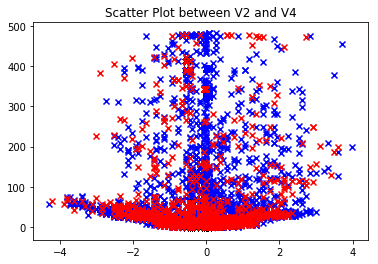

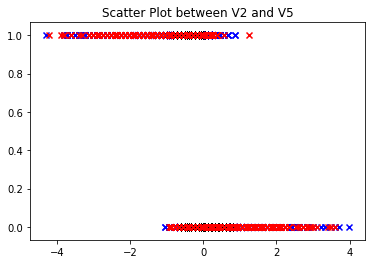

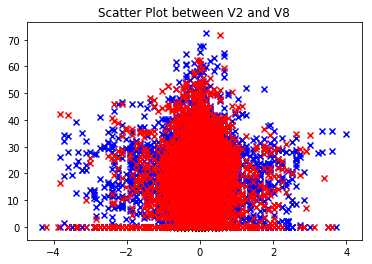

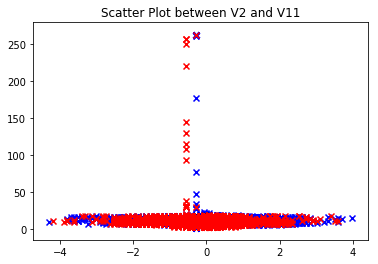

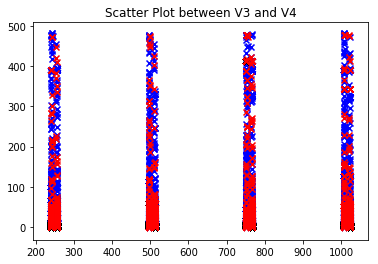

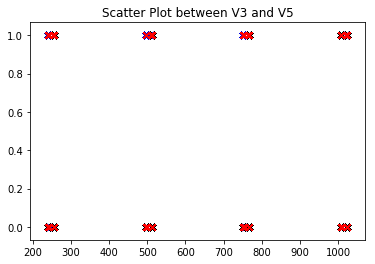

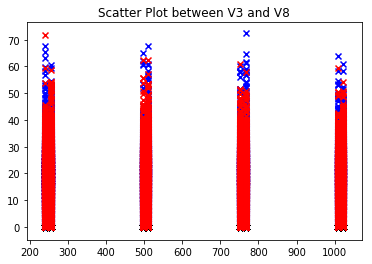

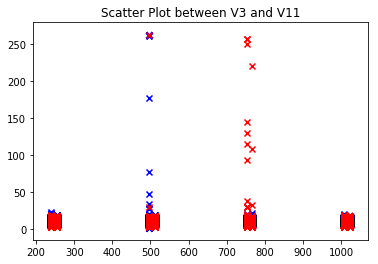

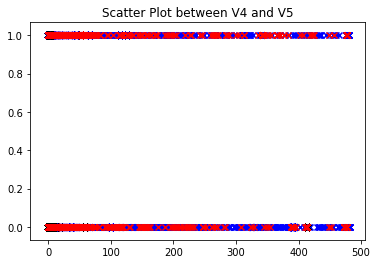

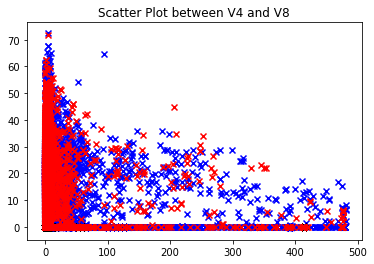

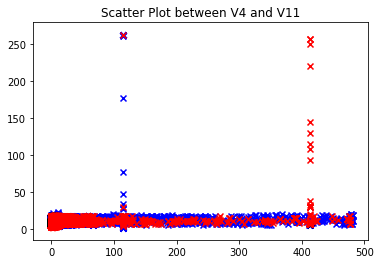

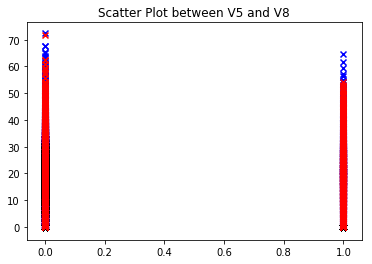

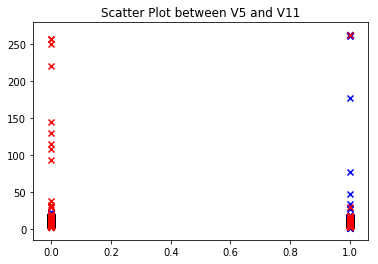

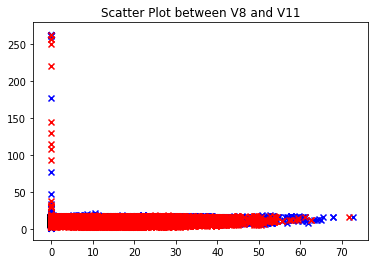

In [8]:
featureNames = X.columns
scatterPlots = 100
print(featureNames)
print(Xpd.columns.values.tolist())


Xpd_CarIsOK = Xpd[Xpd['CarIsOK']==1]
Xpd_ReqMaint = Xpd[Xpd["CarIsOK"]==0]

for i in range(1,len(featureNames)):
    #print("Start",i,featureNames[i])
    for j in range(i+1,len(featureNames)):
        # print("With",j,featureNames[j])
        XplotCarIsOK = Xpd_CarIsOK[featureNames[i]]
        YplotCarIsOK = Xpd_CarIsOK[featureNames[j]]
        XplotReqMaint = Xpd_ReqMaint[featureNames[i]]
        YplotReqMaint = Xpd_ReqMaint[featureNames[j]]
        
        plt.scatter(XplotCarIsOK,YplotCarIsOK, c="b", marker="x")
        plt.scatter(XplotReqMaint,YplotReqMaint, c="r", marker="x")
        
        name = "Scatter Plot between "+featureNames[i]+" and "+featureNames[j]
        plt.title(name)
        
        
        plt.show()




